# <center>CSCE4143-Final-Project</center>
##### <center>San Francisco Crime Classification</center>
##### <center>Group4: David Hammons | Logan Milazzo | Jose Martinez | Steve Liang</center>

### Import modules

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from zipfile import ZipFile

### Downloading Dataset

In [43]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle competitions download -c sf-crime
! ls

kaggle.json
Done
sf-crime.zip: Skipping, found more recently modified local copy (use --force to force download)
kaggle.json  sampleSubmission.csv  Submission.csv  train.csv
sample_data  sf-crime.zip	   test.csv


### Unzip & Loading csv

In [44]:
# data_zip = ZipFile("sf-crime.zip")
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### Investigate training data and testing data

In [45]:
train_df.tail(10)
test_df.head(20)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750
8,8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886


### Data cleaning

In [46]:
drop_col_train = ["Descript", "Resolution", "Address"]
train_df.drop(drop_col_train, axis=1, inplace=True)
train_df

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541
...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,Monday,TARAVAL,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,Monday,INGLESIDE,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,Monday,SOUTHERN,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,Monday,SOUTHERN,-122.390531,37.780607


In [47]:
drop_col_test = "Address"
test_df.drop(drop_col_test, axis=1, inplace=True)

In [48]:
raw_day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

train_df["DayOfWeek"].replace(to_replace=raw_day_of_week, value=[i for i in range(7)], inplace=True)
test_df["DayOfWeek"].replace(to_replace=raw_day_of_week, value=[i for i in range(7)], inplace=True)

In [49]:
unmod_train_df = pd.get_dummies(train_df["PdDistrict"])
unmod_test_df = pd.get_dummies(test_df["PdDistrict"])

train_df = pd.concat([train_df,unmod_train_df], axis=1)
train_df.drop('PdDistrict',inplace =True, axis=1)

test_df = pd.concat([test_df,unmod_test_df], axis=1)
test_df.drop('PdDistrict',inplace =True, axis=1)


train_df

,Dates,Category,DayOfWeek,X,Y,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,2,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,2,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,2,-122.424363,37.800414,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,2,-122.426995,37.800873,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,2,-122.438738,37.771541,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,0,-122.459033,37.714056,0,0,0,0,0,0,0,0,1,0
878045,2003-01-06 00:01:00,LARCENY/THEFT,0,-122.447364,37.731948,0,0,1,0,0,0,0,0,0,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,0,-122.403390,37.780266,0,0,0,0,0,0,0,1,0,0
878047,2003-01-06 00:01:00,VANDALISM,0,-122.390531,37.780607,0,0,0,0,0,0,0,1,0,0


### One hot encoding for Dates

In [50]:
def convertDateOneHot(data_frame):
  year = list(data_frame['Dates'])
  for i in range(len(year)):
    year[i] = year[i][:4:]
  data_frame['Year'] = year

  month = list(data_frame['Dates'])
  for i in range(len(month)):
    month[i] = month[i][5:7:]
  data_frame['Month'] = month

  day = list(data_frame['Dates'])
  for i in range(len(day)):
    day[i] = day[i][8:10:]
  data_frame['Day'] = day

  hour = list(data_frame['Dates'])
  for i in range(len(hour)):
    hour[i] = hour[i][11:-6:]
  data_frame['Hour'] = hour

  minute = list(data_frame['Dates'])
  for i in range(len(minute)):
    minute[i] = minute[i][-5:-3:]
  data_frame['Minute'] = minute

In [51]:
convertDateOneHot(train_df)
convertDateOneHot(test_df)

In [52]:
train_df

,Dates,Category,DayOfWeek,X,Y,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Year,Month,Day,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,2,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0,2015,05,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,2,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0,2015,05,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,2,-122.424363,37.800414,0,0,0,0,1,0,0,0,0,0,2015,05,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,2,-122.426995,37.800873,0,0,0,0,1,0,0,0,0,0,2015,05,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,2,-122.438738,37.771541,0,0,0,0,0,1,0,0,0,0,2015,05,13,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,0,-122.459033,37.714056,0,0,0,0,0,0,0,0,1,0,2003,01,06,00,15
878045,2003-01-06 00:01:00,LARCENY/THEFT,0,-122.447364,37.731948,0,0,1,0,0,0,0,0,0,0,2003,01,06,00,01
878046,2003-01-06 00:01:00,LARCENY/THEFT,0,-122.403390,37.780266,0,0,0,0,0,0,0,1,0,0,2003,01,06,00,01
878047,2003-01-06 00:01:00,VANDALISM,0,-122.390531,37.780607,0,0,0,0,0,0,0,1,0,0,2003,01,06,00,01


In [53]:
test_df

,Id,Dates,DayOfWeek,X,Y,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Year,Month,Day,Hour,Minute
0,0,2015-05-10 23:59:00,6,-122.399588,37.735051,1,0,0,0,0,0,0,0,0,0,2015,05,10,23,59
1,1,2015-05-10 23:51:00,6,-122.391523,37.732432,1,0,0,0,0,0,0,0,0,0,2015,05,10,23,51
2,2,2015-05-10 23:50:00,6,-122.426002,37.792212,0,0,0,0,1,0,0,0,0,0,2015,05,10,23,50
3,3,2015-05-10 23:45:00,6,-122.437394,37.721412,0,0,1,0,0,0,0,0,0,0,2015,05,10,23,45
4,4,2015-05-10 23:45:00,6,-122.437394,37.721412,0,0,1,0,0,0,0,0,0,0,2015,05,10,23,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,2003-01-01 00:01:00,2,-122.408983,37.751987,0,0,0,1,0,0,0,0,0,0,2003,01,01,00,01
884258,884258,2003-01-01 00:01:00,2,-122.425342,37.792681,0,0,0,0,1,0,0,0,0,0,2003,01,01,00,01
884259,884259,2003-01-01 00:01:00,2,-122.445418,37.712075,0,0,1,0,0,0,0,0,0,0,2003,01,01,00,01
884260,884260,2003-01-01 00:01:00,2,-122.387394,37.739479,1,0,0,0,0,0,0,0,0,0,2003,01,01,00,01


In [54]:
train_df.drop('Dates',axis=1,inplace=True)
test_df.drop('Dates',axis=1,inplace=True)

In [55]:
X = train_df.drop(['Category'],axis=1)
y = pd.get_dummies(train_df['Category'])

X.head()

,DayOfWeek,X,Y,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Year,Month,Day,Hour,Minute
0,2,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0,2015,05,13,23,53
1,2,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0,2015,05,13,23,53
2,2,-122.424363,37.800414,0,0,0,0,1,0,0,0,0,0,2015,05,13,23,33
3,2,-122.426995,37.800873,0,0,0,0,1,0,0,0,0,0,2015,05,13,23,30
4,2,-122.438738,37.771541,0,0,0,0,0,1,0,0,0,0,2015,05,13,23,30


In [56]:
y.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X = X.astype(float)
y = y.astype(float)

### Split training and testing dataset with 90% training data and 10% testing data

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(790244, 18) (790244, 39)
(87805, 18) (87805, 39)


### Building Layers for Neural Network

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=(X.shape[1], )),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(39, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1900      
                                                                 
 dense_5 (Dense)             (None, 80)                8080      
                                                                 
 dense_6 (Dense)             (None, 60)                4860      
                                                                 
 dense_7 (Dense)             (None, 39)                2379      
                                                                 
Total params: 17,219
Trainable params: 17,219
Non-trainable params: 0
_________________________________________________________________


### Compile model with parameters: loss, optimizer, and metrics

In [60]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = "adam",
    metrics = ['accuracy']
)

### Early Stopping when the difference of loss is 1e-3 after 5 epochs

In [61]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'loss',
    min_delta = 1e-3,
    patience = 5
)

### Train model with 10 epochs

In [62]:
final_model = model.fit(
    X_train,
    y_train,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)

Epoch 1/10
24696/24696 [==============================] - 57s 2ms/step - loss: 0.1039 - accuracy: 0.2000
Epoch 2/10
24696/24696 [==============================] - 47s 2ms/step - loss: 0.0915 - accuracy: 0.2080
Epoch 3/10
24696/24696 [==============================] - 49s 2ms/step - loss: 0.0914 - accuracy: 0.2128
Epoch 4/10
24696/24696 [==============================] - 45s 2ms/step - loss: 0.0912 - accuracy: 0.2203
Epoch 5/10
24696/24696 [==============================] - 46s 2ms/step - loss: 0.0911 - accuracy: 0.2267
Epoch 6/10
24696/24696 [==============================] - 48s 2ms/step - loss: 0.0910 - accuracy: 0.2290
Epoch 7/10
24696/24696 [==============================] - 45s 2ms/step - loss: 0.0909 - accuracy: 0.2303


### Output Accuracy

In [63]:
accuracy = final_model.history["accuracy"][-1]

print(f"Accuracy Score: {accuracy*100:.4f}%")

Accuracy Score: 23.0302%


### Plotting Accuracy and Loss

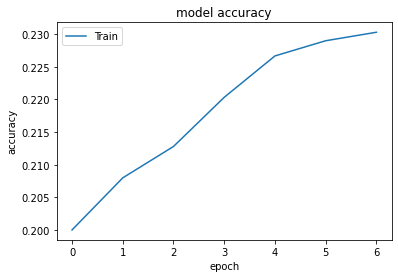

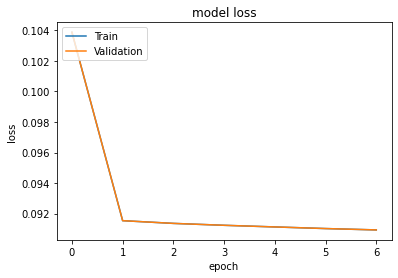

In [64]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(final_model.history["accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Format testing data frame

In [65]:
output_test_df = test_df.copy()
output_test_df = output_test_df.drop(["Id"], axis=1).astype(float)
output_test_df = output_test_df.astype(float)

### Predict the model with test_df

In [66]:
prediction = model.predict(output_test_df)

27634/27634 [==============================] - 29s 1ms/step


In [67]:
prediction

array([[0.00367022, 0.09873734, 0.00067736, ..., 0.04191598, 0.05771211,
        0.01877446],
       [0.00323224, 0.09820931, 0.0005625 , ..., 0.04044556, 0.05867831,
        0.01754288],
       [0.00177151, 0.09138934, 0.0002388 , ..., 0.03298296, 0.06007732,
        0.01243977],
       ...,
       [0.00187069, 0.08104583, 0.00141795, ..., 0.09944928, 0.01766879,
        0.00694793],
       [0.00203831, 0.08316922, 0.00148229, ..., 0.09848464, 0.01877964,
        0.00752876],
       [0.00152077, 0.07674655, 0.00117024, ..., 0.09662456, 0.01623107,
        0.00590497]], dtype=float32)

### Organize prediction data for presenting in data frame

In [68]:
s = np.max(prediction, axis =1).reshape(-1,1)
final = np.array((prediction == s), dtype = 'int32')

In [69]:
result = pd.DataFrame()
result['Id'] = test_df['Id']

In [70]:
sample=pd.read_csv('sampleSubmission.csv')
column_names = list(sample.columns)
column_names.remove('Id')
for i, e in enumerate(column_names):
    result[e] = final[:,i]

In [71]:
result.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
result.to_csv('Submission.csv',index=False)

In [73]:
# submit the file to kaggle
!kaggle competitions submit -c sf-crime -f Submission.csv -m "Message"

100% 71.6M/71.6M [00:01<00:00, 45.5MB/s]
Successfully submitted to San Francisco Crime Classification